In [1]:

from src.algorithms.a_star import a_star_search,a_star_search_modified
from src.algorithms.greedy import greedy_search, greedy_search_mod
from grid_generator import generate_grid, save_grid_to_csv
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import Image



#Genera caminos aleatorios

In [2]:
def save_grid_to_csv(grid, filename):
    np.savetxt(filename, grid, fmt='%d', delimiter=',')



In [3]:
import csv

def analyze_grid_from_csv(filename):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        grid = list(reader)

    # Convert string numbers to integers
    grid = [[int(num) for num in row] for row in grid]

    # Find the position of number 4
    for i, row in enumerate(grid):
        for j, num in enumerate(row):
            if num == 4:
                start = (i, j)
                break

    # Find the numbers 1 that are not on the sides
    # ones_positions = []
    # for i in range(1, len(grid) - 1):
    #     for j in range(1, len(grid[i]) - 1):
    #         if grid[i][j] == 1:
    #             ones_positions.append((i, j))

    # Find the positions of number 3
    threes_positions = []
    for i, row in enumerate(grid):
        for j, num in enumerate(row):
            if num == 3:
                threes_positions.append((i, j))

    # Determine the end position based on the grid dimensions
    end = (len(grid) - 1, len(grid[0]) - 1)

    return  threes_positions


In [4]:
n = 20 # tamaño del arreglo
num_walls = 2*n
grid_name = "grid_3"

#grid, start, end, aproach_nodes = generate_grid(n, num_walls)

filename = "./data/grid_3.csv"  # Replace "your_file.csv" with the actual filename
with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        grid = list(reader)
grid = np.array( list(map(lambda inner_list: list(map(int, inner_list)), grid)))
start = (0, 1)
end = (n-1, n-2)
aproach_nodes = analyze_grid_from_csv(filename)


plt.imshow(grid, cmap='inferno')
plt.savefig('./images/'+ grid_name +'.png')

# inicio amarillo, blanco final, rojo puntos de recogida

 A * normalita

In [5]:


# Lista de casillas a colorear
casillas_colorear_A = a_star_search(grid,end)

# Crear una matriz de colores basada en el laberinto y las casillas coloreadas
color_matrix_A = np.zeros_like(grid, dtype=int)

for i in range(5):
    color_matrix_A[grid == i] = i


#Colorear las casillas especificadas
for casilla in casillas_colorear_A:
    row = casilla // n
    col = casilla % n
    color_matrix_A[row, col] = 2

color_matrix_A[grid == 3] = 3
color_matrix_A[grid == 4] = 4
color_matrix_A[grid == 5] = 5
# Crear la imagen utilizando matplotlib
plt.imshow(color_matrix_A, cmap='inferno')
plt.savefig('./images/'+ grid_name +'_solved_A'+'.png')



4869


A* modificada con los pesos

In [6]:

# Lista de casillas a colorear
casillas_colorear_Amod = a_star_search_modified(grid,end,aproach_nodes)

# Crear una matriz de colores basada en el laberinto y las casillas coloreadas
color_matrix_Amod = np.zeros_like(grid, dtype=int)


for i in range(5):
    color_matrix_Amod[grid == i] = i


#Colorear las casillas especificadas
for casilla in casillas_colorear_Amod:
    row = casilla // n
    col = casilla % n
    color_matrix_Amod[row, col] = 2

color_matrix_Amod[grid == 3] = 3
color_matrix_Amod[grid == 4] = 4
color_matrix_Amod[grid == 5] = 5
# Crear la imagen utilizando matplotlib
plt.imshow(color_matrix_Amod, cmap='inferno')
plt.savefig('./images/'+ grid_name +'_solved_A_mod'+'.png')


6504


Greedy normal

In [7]:

# Lista de casillas a colorear
casillas_colorear_greedy = greedy_search(grid,aproach_nodes)

# Crear una matriz de colores basada en el laberinto y las casillas coloreadas
color_matrix_greedy = np.zeros_like(grid, dtype=int)


for i in range(5):
    color_matrix_greedy[grid == i] = i


#Colorear las casillas especificadas
for casilla in casillas_colorear_greedy:
    row = casilla // n
    col = casilla % n
    color_matrix_greedy[row, col] = 2

color_matrix_greedy[grid == 3] = 3
color_matrix_greedy[grid == 4] = 4
color_matrix_greedy[grid == 5] = 5
# Crear la imagen utilizando matplotlib
plt.imshow(color_matrix_greedy, cmap='inferno')
plt.savefig('./images/'+ grid_name +'_solved_greedy'+'.png')

Greedy modificado


In [8]:

# Lista de casillas a colorear
casillas_colorear_greedy_mod = greedy_search_mod(grid,aproach_nodes)

# Crear una matriz de colores basada en el laberinto y las casillas coloreadas
color_matrix_greedy_mod = np.zeros_like(grid, dtype=int)


for i in range(5):
    color_matrix_greedy_mod[grid == i] = i


#Colorear las casillas especificadas
for casilla in casillas_colorear_greedy_mod:
    row = casilla // n
    col = casilla % n
    color_matrix_greedy_mod[row, col] = 2

color_matrix_greedy_mod[grid == 3] = 3
color_matrix_greedy_mod[grid == 4] = 4
color_matrix_greedy_mod[grid == 5] = 5
# Crear la imagen utilizando matplotlib
plt.imshow(color_matrix_greedy_mod, cmap='inferno')
plt.savefig('./images/'+ grid_name +'_solved_greedy_mod'+'.png')

guardo cambios


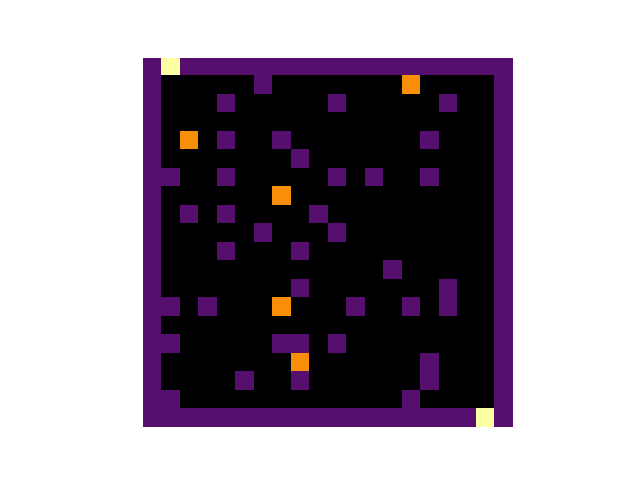

In [9]:
Image(filename='./images/'+ grid_name +'.png') 



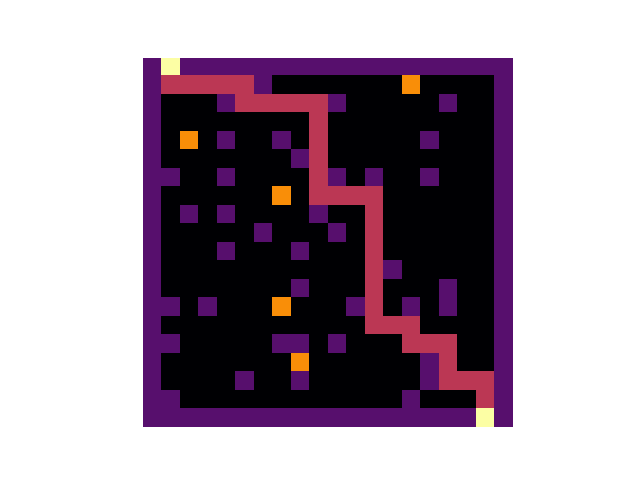

In [10]:
Image(filename='./images/'+ grid_name +'_solved_A'+'.png') 


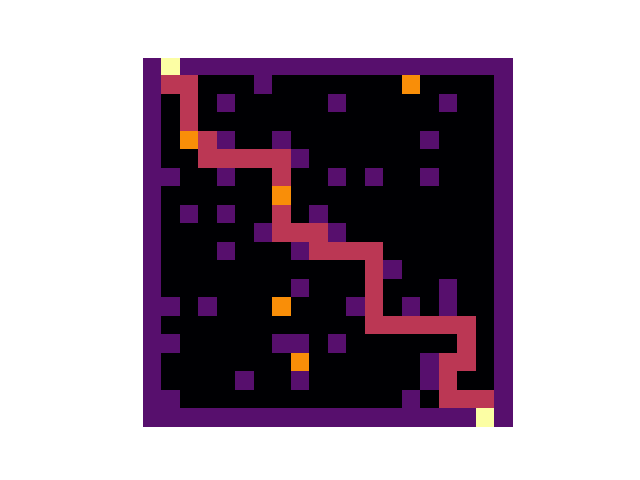

In [11]:
Image(filename='./images/'+ grid_name +'_solved_A_mod'+'.png') 

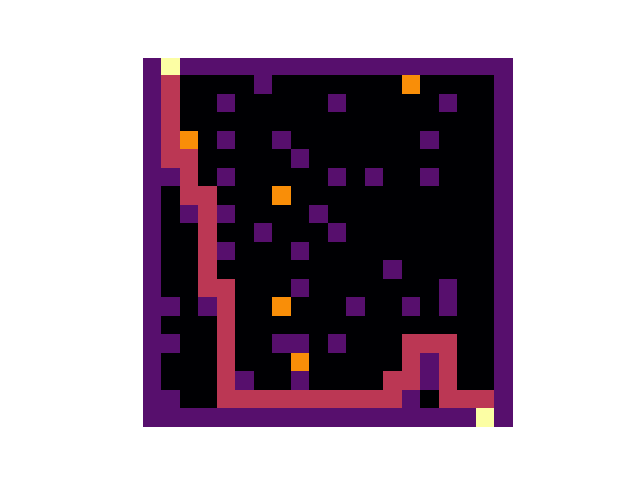

In [12]:
Image(filename='./images/'+ grid_name +'_solved_greedy'+'.png') 

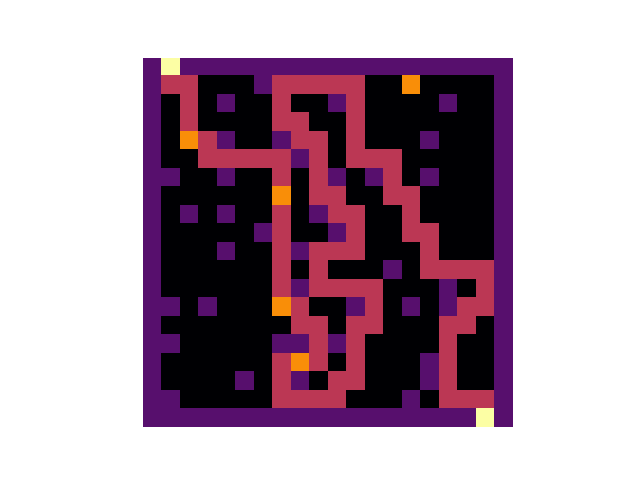

In [13]:
Image(filename='./images/'+ grid_name +'_solved_greedy_mod'+'.png') 

In [14]:

# folder_path = "data"
# csv_filename = os.path.join(folder_path, grid_name + '.csv' )
# save_grid_to_csv(grid, csv_filename)

In [15]:

# folder_path = "data"
# csv_filename = os.path.join(folder_path, grid_name + '.csv' )
# save_grid_to_csv(grid, csv_filename)

: 

Cosas por hacer con este proyecto:

* Hablar con el profe para que me recomiende que hacer para que se acerque a los nodos, algo así como mini objetivos o ciertas restricciones de que se debe acercar sí o sí
* Escoger un ejemplo concreto y ver cuando hago cambios en las funciones
* Hacer que se pueda cambiar la euristica sin cambiar la función, algo como un númerito o algo así
* ver porqué monda salen esos maze de imagenes, creo que es el algoritmo de A* propiamente con la función de imprimir
* comentar todo en ingles y subir a un repositorio
* Comenzar a escirbir algo del documento escrito
